Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
%tensorflow_version 2.2

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.2`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
# making all the necessary imports
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from glob import glob

import warnings
warnings.filterwarnings('ignore')

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/drive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = '/content/drive/MyDrive/CNN'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [ ]:
#!unzip drive/MyDrive/CNN.zip  

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2256
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2256 files belonging to 9 classes.
Using 1805 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2256 files belonging to 9 classes.
Using 451 files for validation.


In [ ]:
## for test set , creating only 1 batch
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=123,
    batch_size=118,
    image_size=(img_height,img_width)
)

Found 118 files belonging to 9 classes.


In [ ]:
#checking train +valid size
1792+447

2239

In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


In [ ]:
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset
dataset = tf.data.Dataset.range(10)
print(list(dataset.as_numpy_iterator()))
dataset1 = dataset.take(3)
print(list(dataset1.as_numpy_iterator()))
dataset2 = dataset.take(5)
print(list(dataset2.as_numpy_iterator()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2]
[0, 1, 2, 3, 4]


In [ ]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

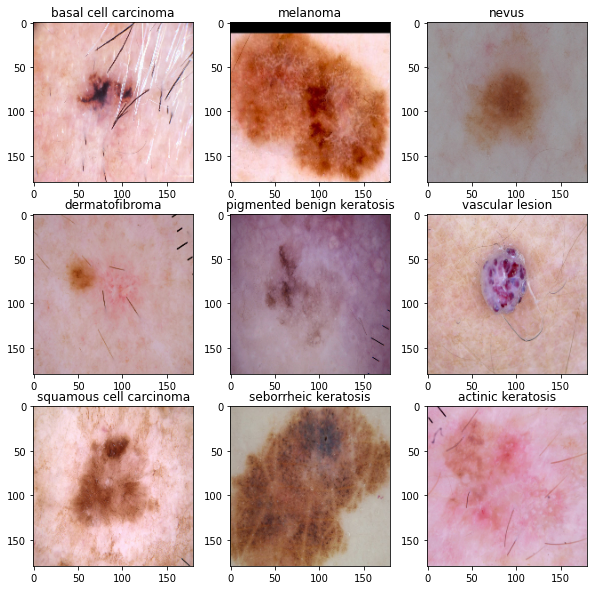

In [ ]:


### your code goes here, you can use training or validation data to visualize

plot_idx=0
visited={}
visited_all=False
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(50):
  if not visited_all:
    for i in range(9):
    # print(images," | ",labels)
      # print(images.shape)
      # print(images[0].shape)
      # plt.figure(figsize=(20,20))
      if len(visited.keys())==9:
        visited_all=True
        break
      if class_names[labels[i]] in visited.keys():
        continue
      else:
        plt.subplot(3,3,plot_idx+1)
        plt.imshow(images[i].numpy().astype("uint8"));
        plt.title(class_names[labels[i]])
        visited[class_names[labels[i]]]="Y"
        plot_idx+=1
  else:
    break

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
# Demo Cell

dataset = tf.data.Dataset.range(5)
print(list(dataset.as_numpy_iterator()))
dataset = dataset.map(lambda x: x**2)
print(list(dataset.as_numpy_iterator()))
dataset = dataset.cache()
# The first time reading through the data will generate the data using
# `range` and `map`.
print(list(dataset.as_numpy_iterator()))

# Subsequent iterations read from the cache.
print(list(dataset.as_numpy_iterator()))

[0, 1, 2, 3, 4]
[0, 1, 4, 9, 16]
[0, 1, 4, 9, 16]
[0, 1, 4, 9, 16]


In [ ]:
dataset = tf.data.Dataset.range(3)
print(list(dataset.as_numpy_iterator()))
dataset = dataset.prefetch(2)
print(list(dataset.as_numpy_iterator()))

[0, 1, 2]
[0, 1, 2]


In [ ]:
# https://stackoverflow.com/questions/56613155/tensorflow-tf-data-autotune

# https://medium.com/analytics-vidhya/tensorflow-2-0-tf-data-api-eaa9889186cc

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
num_classes = 9

# https://keras.io/api/layers/preprocessing_layers/image_preprocessing/rescaling/
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Rescaling
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

# Do all the possible playing with Hyperparameters to get the best model. See if you can get a model which
# is not overfitting or underfitting
# Write down proper insights about your model

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
# https://datascience.stackexchange.com/questions/73093/what-does-from-logits-true-do-in-sparsecategoricalcrossentropy-loss-function
# https://stackoverflow.com/questions/57253841/from-logits-true-and-from-logits-false-get-different-training-result-for-tf-loss
# https://keras.io/api/optimizers/
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 90, 90, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                  

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 17s 109ms/step - loss: 3.8597 - accuracy: 0.2033 - val_loss: 2.1610 - val_accuracy: 0.2173
Epoch 2/20
57/57 [==============================] - 3s 56ms/step - loss: 1.9756 - accuracy: 0.2305 - val_loss: 2.1379 - val_accuracy: 0.1818
Epoch 3/20
57/57 [==============================] - 3s 56ms/step - loss: 1.8716 - accuracy: 0.3008 - val_loss: 1.8739 - val_accuracy: 0.3725
Epoch 4/20
57/57 [==============================] - 3s 57ms/step - loss: 1.7431 - accuracy: 0.3596 - val_loss: 1.7525 - val_accuracy: 0.3769
Epoch 5/20
57/57 [==============================] - 3s 56ms/step - loss: 1.6310 - accuracy: 0.4255 - val_loss: 1.7746 - val_accuracy: 0.3902
Epoch 6/20
57/57 [==============================] - 3s 56ms/step - loss: 1.5394 - accuracy: 0.4371 - val_loss: 1.6026 - val_accuracy: 0.4412
Epoch 7/20
57/57 [==============================] - 3s 56ms/step - loss: 1.4334 - accuracy: 0.4981 - val_loss: 1.5788 - val_accuracy: 0.4900
Epoch 8/20


### Visualizing training results

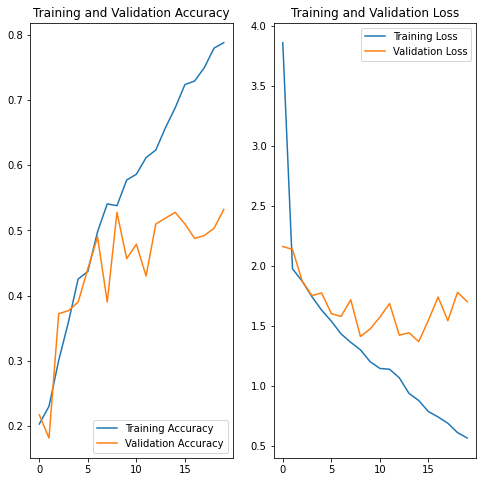

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y_true=[]
y_pred=[]
for images, labels in test_ds.take(1):
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred = np.argmax(model.predict(images),axis=1)
print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred,target_names=class_names))
print("*"*20)
  

Accuracy on test dataset :  0.288135593220339
                            precision    recall  f1-score   support

         actinic keratosis       0.67      0.12      0.21        16
      basal cell carcinoma       0.23      0.19      0.21        16
            dermatofibroma       0.50      0.12      0.20        16
                  melanoma       0.17      0.19      0.18        16
                     nevus       0.29      0.50      0.36        16
pigmented benign keratosis       0.28      0.75      0.41        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.33      0.12      0.18        16
           vascular lesion       0.67      0.67      0.67         3

                  accuracy                           0.29       118
                 macro avg       0.35      0.30      0.27       118
              weighted avg       0.35      0.29      0.25       118

********************


In [ ]:
# lets try the same model with more epochs and different opitmizer

num_classes = 9

model_rmsprop = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

model_rmsprop.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 30
history_rmsprop = model_rmsprop.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/30
57/57 [==============================] - 5s 69ms/step - loss: 3.2708 - accuracy: 0.2288 - val_loss: 2.0292 - val_accuracy: 0.2616
Epoch 2/30
57/57 [==============================] - 3s 58ms/step - loss: 1.9429 - accuracy: 0.3230 - val_loss: 1.9158 - val_accuracy: 0.2927
Epoch 3/30
57/57 [==============================] - 3s 59ms/step - loss: 1.7076 - accuracy: 0.3956 - val_loss: 1.8297 - val_accuracy: 0.3415
Epoch 4/30
57/57 [==============================] - 3s 59ms/step - loss: 1.6658 - accuracy: 0.4299 - val_loss: 1.6999 - val_accuracy: 0.4257
Epoch 5/30
57/57 [==============================] - 3s 59ms/step - loss: 1.5299 - accuracy: 0.4792 - val_loss: 1.7326 - val_accuracy: 0.3703
Epoch 6/30
57/57 [==============================] - 3s 59ms/step - loss: 1.4188 - accuracy: 0.5280 - val_loss: 1.5469 - val_accuracy: 0.4634
Epoch 7/30
57/57 [==============================] - 3s 59ms/step - loss: 1.3393 - accuracy: 0.5368 - val_loss: 1.5082 - val_accuracy: 0.4767
Epoch 8/30
57

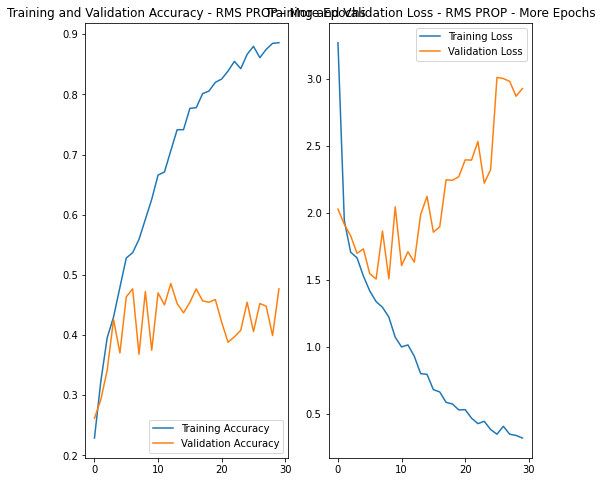

In [ ]:
#visualizing results for different model

acc = history_rmsprop.history['accuracy']
val_acc = history_rmsprop.history['val_accuracy']

loss = history_rmsprop.history['loss']
val_loss = history_rmsprop.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy - RMS PROP - More Epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss - RMS PROP - More Epochs')
plt.show()

In [ ]:
y_true=[]
y_pred=[]
for images, labels in test_ds.take(1):
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred = np.argmax(model.predict(images),axis=1)
print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred,target_names=class_names))
print("*"*20)




Accuracy on test dataset :  0.288135593220339
                            precision    recall  f1-score   support

         actinic keratosis       0.67      0.12      0.21        16
      basal cell carcinoma       0.23      0.19      0.21        16
            dermatofibroma       0.50      0.12      0.20        16
                  melanoma       0.17      0.19      0.18        16
                     nevus       0.29      0.50      0.36        16
pigmented benign keratosis       0.28      0.75      0.41        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.33      0.12      0.18        16
           vascular lesion       0.67      0.67      0.67         3

                  accuracy                           0.29       118
                 macro avg       0.35      0.30      0.27       118
              weighted avg       0.35      0.29      0.25       118

********************


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
#### **Here we trained the same model with different optimizers (adams , rmsprop) and epochs(20 ,30) .As we can see  , till 6-7 epochs  training and validation accuracy both increase . But after that training accuracy keeps on increasing to 80% whereas validation accuracy keeps fluctuating at 50% . Which means has begun to overfit .**

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomFlip

# Todo, after you have analysed the model fit history for presence of underfit or overfit, 
# choose an appropriate data augumentation strategy. 

data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

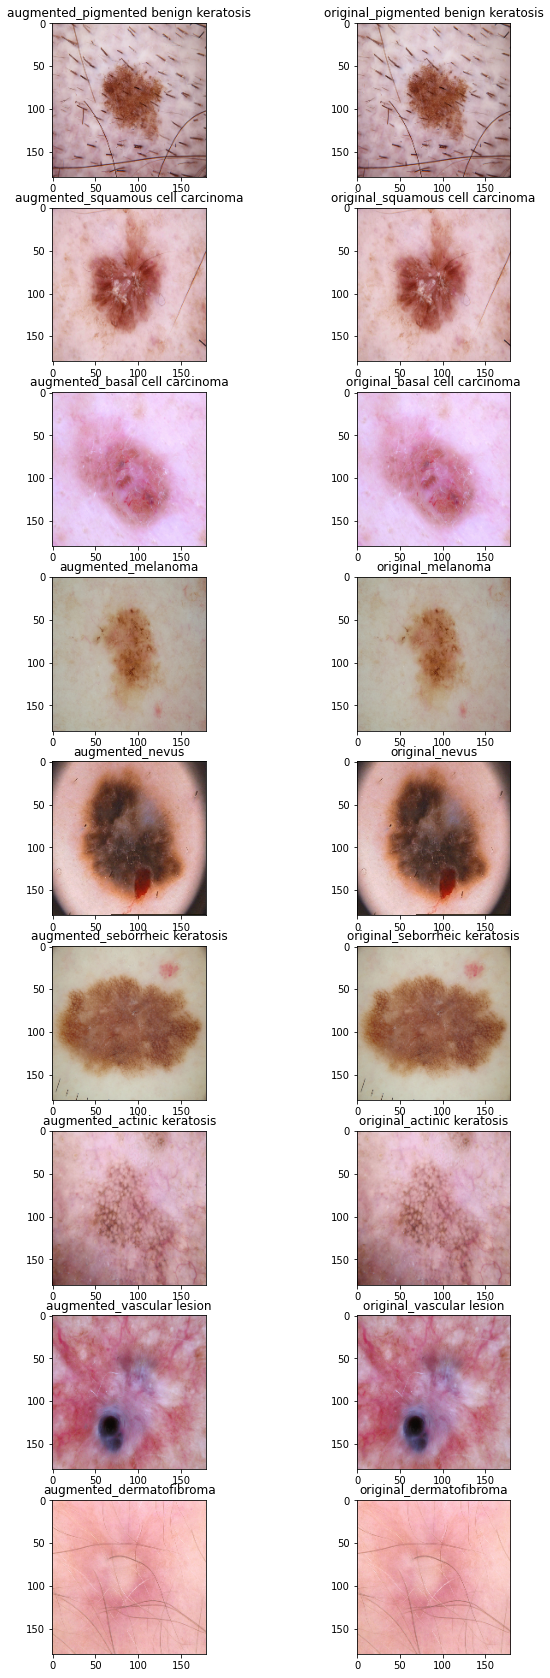

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plot_idx=0
visited={}
visited_all=False
plt.figure(figsize=(10,30))
for images, labels in train_ds.take(50):
  if not visited_all:
    for i in range(9):
    # print(images," | ",labels)
      # print(images.shape)
      # print(images[0].shape)
      # plt.figure(figsize=(20,20))
      if len(visited.keys())==9:
        visited_all=True
        break
      if class_names[labels[i]] in visited.keys():
        continue
      else:
        plt.subplot(9,2,plot_idx+1)
        x=data_aug(images)
        plt.imshow(x[i].numpy().astype("uint8"));
        # plt.imshow(images[i].numpy().astype("uint8"));
        plt.title("augmented_"+class_names[labels[i]])
        plot_idx+=1
        plt.subplot(9,2,plot_idx+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("original_"+class_names[labels[i]])
        visited[class_names[labels[i]]]="Y"
        plot_idx+=1
        
  else:
    break


# Do all the possible playing with Hyperparameters to get the best model. See if you can get a model which
# is not overfitting or underfitting
# Write down proper insights about your model

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
                    data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

# https://datascience.stackexchange.com/questions/73093/what-does-from-logits-true-do-in-sparsecategoricalcrossentropy-loss-function
# https://stackoverflow.com/questions/57253841/from-logits-true-and-from-logits-false-get-different-training-result-for-tf-loss
# https://keras.io/api/optimizers/
### Todo, choose an appropirate optimiser and loss function


### Compiling the model

In [ ]:
## Your code goes here
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 90, 90, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 64)        36928     
                                                      

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
# history = ## your training code

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 5s 61ms/step - loss: 3.7627 - accuracy: 0.1507 - val_loss: 2.1422 - val_accuracy: 0.1552
Epoch 2/20
57/57 [==============================] - 3s 59ms/step - loss: 2.0342 - accuracy: 0.2238 - val_loss: 2.0810 - val_accuracy: 0.1951
Epoch 3/20
57/57 [==============================] - 3s 59ms/step - loss: 1.9733 - accuracy: 0.2670 - val_loss: 2.0814 - val_accuracy: 0.1951
Epoch 4/20
57/57 [==============================] - 3s 59ms/step - loss: 1.8060 - accuracy: 0.3457 - val_loss: 1.8169 - val_accuracy: 0.3193
Epoch 5/20
57/57 [==============================] - 3s 59ms/step - loss: 1.6705 - accuracy: 0.4100 - val_loss: 1.9053 - val_accuracy: 0.3104
Epoch 6/20
57/57 [==============================] - 3s 59ms/step - loss: 1.5893 - accuracy: 0.4482 - val_loss: 1.7154 - val_accuracy: 0.3681
Epoch 7/20
57/57 [==============================] - 3s 60ms/step - loss: 1.5107 - accuracy: 0.4798 - val_loss: 1.6682 - val_accuracy: 0.3991
Epoch 8/20
57

### Visualizing the results

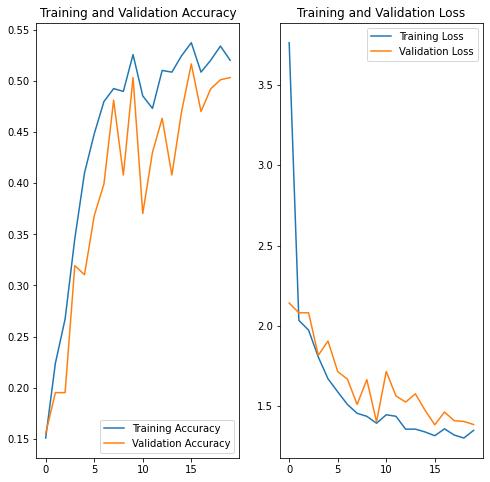

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# try with different optimizer
model_aug_adagrad = Sequential([
                    data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

model_aug_adagrad.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 25
history_aug_adagrad = model_aug_adagrad.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/25
57/57 [==============================] - 4s 61ms/step - loss: 2.0451 - accuracy: 0.2105 - val_loss: 2.0694 - val_accuracy: 0.1574
Epoch 2/25
57/57 [==============================] - 3s 59ms/step - loss: 2.0085 - accuracy: 0.2288 - val_loss: 2.0234 - val_accuracy: 0.2949
Epoch 3/25
57/57 [==============================] - 3s 59ms/step - loss: 1.9831 - accuracy: 0.2632 - val_loss: 2.0217 - val_accuracy: 0.2616
Epoch 4/25
57/57 [==============================] - 3s 59ms/step - loss: 1.9617 - accuracy: 0.2859 - val_loss: 1.9990 - val_accuracy: 0.3126
Epoch 5/25
57/57 [==============================] - 3s 59ms/step - loss: 1.9240 - accuracy: 0.3080 - val_loss: 1.9646 - val_accuracy: 0.3193
Epoch 6/25
57/57 [==============================] - 3s 59ms/step - loss: 1.9028 - accuracy: 0.3091 - val_loss: 1.9215 - val_accuracy: 0.3437
Epoch 7/25
57/57 [==============================] - 3s 59ms/step - loss: 1.8638 - accuracy: 0.3341 - val_loss: 1.8864 - val_accuracy: 0.3592
Epoch 8/25
57

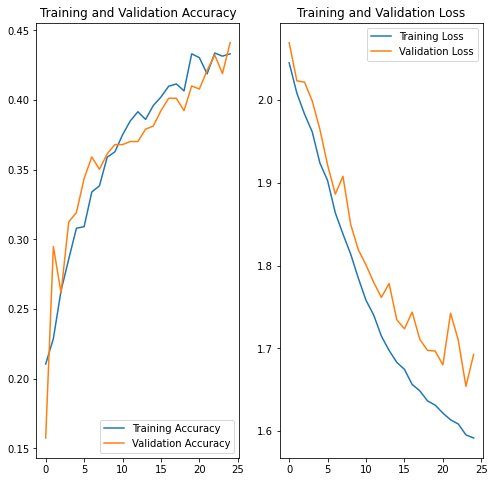

In [ ]:
# creating a performance visualisation for adagrad optimiser
acc = history_aug_adagrad.history['accuracy']
val_acc = history_aug_adagrad.history['val_accuracy']

loss = history_aug_adagrad.history['loss']
val_loss = history_aug_adagrad.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# creating another model with SGD opitmizer
model_aug_sgd = Sequential([
                    data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

model_aug_sgd.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 25
history_aug_sgd = model_aug_sgd.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
57/57 [==============================] - 4s 60ms/step - loss: 2.0536 - accuracy: 0.2039 - val_loss: 2.0899 - val_accuracy: 0.3348
Epoch 2/25
57/57 [==============================] - 3s 58ms/step - loss: 1.9999 - accuracy: 0.2537 - val_loss: 2.0778 - val_accuracy: 0.3193
Epoch 3/25
57/57 [==============================] - 3s 58ms/step - loss: 1.9602 - accuracy: 0.2820 - val_loss: 2.0000 - val_accuracy: 0.3326
Epoch 4/25
57/57 [==============================] - 3s 58ms/step - loss: 1.9369 - accuracy: 0.2903 - val_loss: 1.9993 - val_accuracy: 0.2506
Epoch 5/25
57/57 [==============================] - 3s 58ms/step - loss: 1.9042 - accuracy: 0.3030 - val_loss: 1.9007 - val_accuracy: 0.3681
Epoch 6/25
57/57 [==============================] - 3s 59ms/step - loss: 1.8510 - accuracy: 0.3175 - val_loss: 1.9101 - val_accuracy: 0.3326
Epoch 7/25
57/57 [==============================] - 3s 58ms/step - loss: 1.8217 - accuracy: 0.3435 - val_loss: 1.8289 - val_accuracy: 0.2705
Epoch 8/25
57

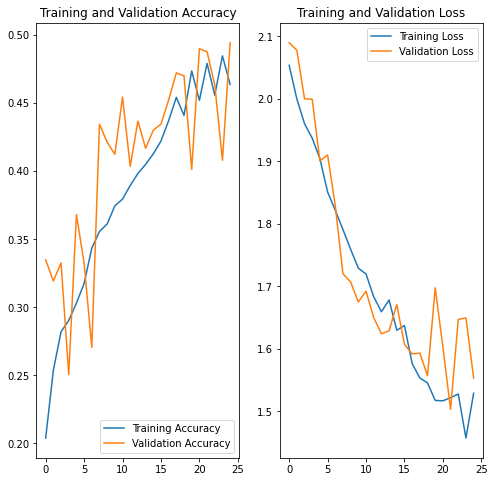

In [ ]:
# creating performance visualisation for sgd optimizer
acc = history_aug_sgd.history['accuracy']
val_acc = history_aug_sgd.history['val_accuracy']

loss = history_aug_sgd.history['loss']
val_loss = history_aug_sgd.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#checking the performance on the test set 
y_true=[]
y_pred=[]
for images, labels in test_ds.take(1):
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=y_pred = np.argmax(model.predict(images),axis=1)
  # break
  print("Adam optimizer")
  print(classification_report(y_true,y_pred,target_names=class_names))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)
  y_pred=np.argmax(model_aug_adagrad.predict(images),axis =1)
  # break
  print("Adagrad optimizer")
  print(classification_report(y_true,y_pred,target_names=class_names))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)
  y_pred=np.argmax(model_aug_sgd.predict(images),axis =1)
  # break
  print("SGD optimizer")
  print(classification_report(y_true,y_pred,target_names=class_names))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)



  

Adam optimizer
                            precision    recall  f1-score   support

         actinic keratosis       0.25      0.06      0.10        16
      basal cell carcinoma       0.32      0.69      0.44        16
            dermatofibroma       1.00      0.06      0.12        16
                  melanoma       0.27      0.25      0.26        16
                     nevus       0.42      0.50      0.46        16
pigmented benign keratosis       0.26      0.62      0.37        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.50      0.12      0.20        16
           vascular lesion       0.67      0.67      0.67         3

                  accuracy                           0.33       118
                 macro avg       0.41      0.33      0.29       118
              weighted avg       0.43      0.33      0.28       118

Accuracy on test dataset :  0.3305084745762712
********************
Adagrad optimizer
            

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?


#### <u>Findings</u> <b>We can see that after addition of Agumentation layers we were able to reduce the model's overfitting .  However in this case the model is not able to generalise well . We tried out different set of optmizers sgd , adagrad , adams which gave models that had low Training and Validation accuracy. The accuracy figures were between 45-55% both for training and validation . But now the model has begun to overfit.</b>

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
train_path_list = list(data_dir_train.glob('*/*.jpg'))

In [ ]:
# dct={}
# for x in train_path_list:
#   result=str(x).split("/")
#   if result[2] in dct.keys():
#     dct[result[2]]+=1
#   else:
#     dct[result[2]]=1

In [ ]:
# cancer=[]
# count=[]
# for k,v in dct.items():
#   cancer.append(k)
#   count.append(v)

df=pd.DataFrame({"cancer_type":[str(x).split("/")[2] for x in train_path_list]})

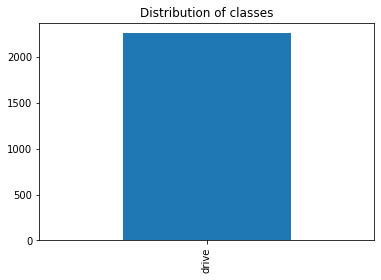

In [ ]:
df['cancer_type'].value_counts().plot(kind='bar')
plt.title("Distribution of classes")
plt.show()

In [ ]:
## Your code goes here.
# dataframe_dict_original = dict(zip(path_list, lesion_list))
# original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
# original_df

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### **Ans : seborrheic keratosis**
#### - Which classes dominate the data in terms proportionate number of samples?
#### <b>Ans : pigmented benign keratosis</b>


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset= pathlib.Path(root_path + '/Train')
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset / i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F11CE7D4B90>: 100%|██████████| 500/500 [00:19<00:00, 25.06 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F113A1B3D10>: 100%|██████████| 500/500 [00:18<00:00, 27.50 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1266036450>: 100%|██████████| 500/500 [00:18<00:00, 27.66 Samples/s]


Initialised with 455 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=964x640 at 0x7F113B1542D0>: 100%|██████████| 500/500 [01:35<00:00,  5.23 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F11CE72C410>: 100%|██████████| 500/500 [01:15<00:00,  6.58 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F113A246990>: 100%|██████████| 500/500 [00:17<00:00, 28.19 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F113BAD0210>: 100%|██████████| 500/500 [00:43<00:00, 11.54 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F113A229B10>: 100%|██████████| 500/500 [00:17<00:00, 28.33 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F113A1CCB90>: 100%|██████████| 500/500 [00:17<00:00, 27.79 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
from glob import glob

### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2) 

In [ ]:
#created 500 samples for each
df2['Label'].value_counts()

basal cell carcinoma          500
squamous cell carcinoma       500
actinic keratosis             500
nevus                         500
seborrheic keratosis          500
pigmented benign keratosis    500
vascular lesion               500
dermatofibroma                500
melanoma                      500
Name: Label, dtype: int64

In [ ]:
#new counts
new_list=list(df['cancer_type'].values)
new_list.extend(list(df2['Label'].values))
len(new_list)
final_df=pd.DataFrame({"cancer_type":new_list})
final_df['cancer_type'].value_counts()

drive                         2256
basal cell carcinoma           500
squamous cell carcinoma        500
actinic keratosis              500
nevus                          500
seborrheic keratosis           500
pigmented benign keratosis     500
vascular lesion                500
dermatofibroma                 500
melanoma                       500
Name: cancer_type, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train=pathlib.Path(root_path + '/Train')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6756 files belonging to 9 classes.
Using 5405 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6756 files belonging to 9 classes.
Using 1351 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.40),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.40),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 90, 90, 64)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 90, 90, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 90, 90, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                 

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 33s 184ms/step - loss: 2.6903 - accuracy: 0.1315 - val_loss: 2.1891 - val_accuracy: 0.1384
Epoch 2/50
169/169 [==============================] - 31s 175ms/step - loss: 2.1816 - accuracy: 0.1399 - val_loss: 2.1856 - val_accuracy: 0.1384
Epoch 3/50
169/169 [==============================] - 30s 173ms/step - loss: 2.1764 - accuracy: 0.1369 - val_loss: 2.1863 - val_accuracy: 0.1384
Epoch 4/50
169/169 [==============================] - 30s 171ms/step - loss: 2.1489 - accuracy: 0.1721 - val_loss: 2.0002 - val_accuracy: 0.2598
Epoch 5/50
169/169 [==============================] - 30s 173ms/step - loss: 1.7387 - accuracy: 0.3475 - val_loss: 1.6157 - val_accuracy: 0.3708
Epoch 6/50
169/169 [==============================] - 30s 172ms/step - loss: 1.4587 - accuracy: 0.4413 - val_loss: 1.3780 - val_accuracy: 0.4893
Epoch 7/50
169/169 [==============================] - 30s 172ms/step - loss: 1.3031 - accuracy: 0.5171 - val_loss: 1.2286 - val_ac

#### **Todo:**  Visualize the model results

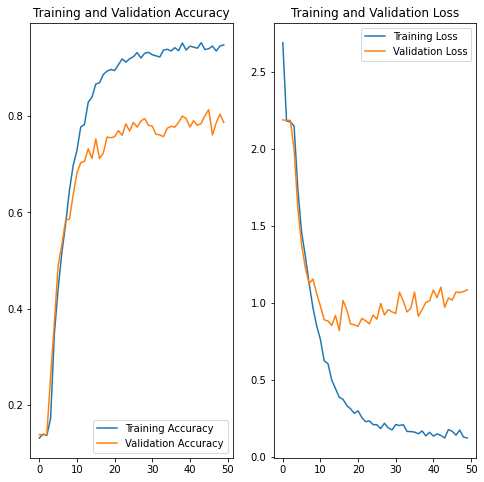

In [ ]:
# plot for ADaM optimizer
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#trying with a different model optimizer 
model_imbalance_sgd = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

model_imbalance_sgd.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 30
## Your code goes here, use 50 epochs.
history_imbalance_sgd = model_imbalance_sgd.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 31s 175ms/step - loss: 2.1838 - accuracy: 0.1556 - val_loss: 2.1624 - val_accuracy: 0.2191
Epoch 2/30
169/169 [==============================] - 30s 174ms/step - loss: 2.1011 - accuracy: 0.2118 - val_loss: 2.0724 - val_accuracy: 0.2494
Epoch 3/30
169/169 [==============================] - 30s 174ms/step - loss: 2.0008 - accuracy: 0.2431 - val_loss: 1.8952 - val_accuracy: 0.3249
Epoch 4/30
169/169 [==============================] - 32s 184ms/step - loss: 1.8802 - accuracy: 0.2938 - val_loss: 2.0564 - val_accuracy: 0.1954
Epoch 5/30
169/169 [==============================] - 30s 175ms/step - loss: 1.8003 - accuracy: 0.3295 - val_loss: 1.7133 - val_accuracy: 0.3834
Epoch 6/30
169/169 [==============================] - 31s 176ms/step - loss: 1.6783 - accuracy: 0.3747 - val_loss: 1.7071 - val_accuracy: 0.3383
Epoch 7/30
169/169 [==============================] - 31s 177ms/step - loss: 1.6656 - accuracy: 0.3802 - val_loss: 1.5830 - val_ac

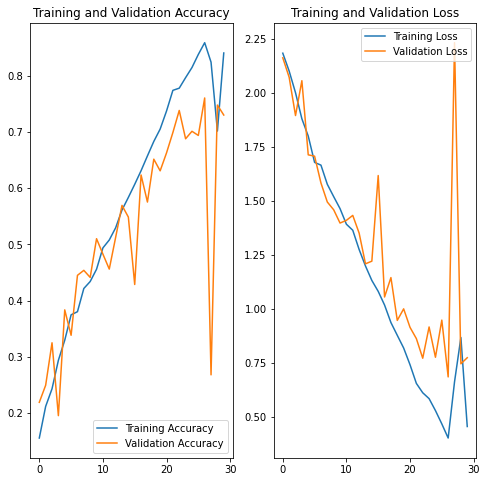

In [ ]:
# plot for SGD optimizer
acc = history_imbalance_sgd.history['accuracy']
val_acc = history_imbalance_sgd.history['val_accuracy']

loss = history_imbalance_sgd.history['loss']
val_loss = history_imbalance_sgd.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

So we tried out the model with different epoch (30,50) and optimizers (adam, sgd ) .  The initial model with adam optimizer with 50 epochs seems to work well with validation accuracy reaching about 80% .

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### <b>We tried different models with optimizers (sgd, adams) and epochs (30,50,30) . By adding augmented images which inturn helped in handling class imbalance , we mitigated/addressed the problem of overfitting . Out of all the models the performance was decent for the model with Adam's optimizer . The model had a train accuracy of ~90% while the validation accuracy was about ~80% . This model learns rapidly (increase in training and validation accuracy)for the first 20 epochs , but after this the learning becomes slow </b>.